### See the RasterPlot of different neurons

In [1]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
from nwbwidgets.allen import AllenRasterWidget
from nwbwidgets.allen import AllenPSTHWidget
import pandas as pd
import numpy as np
import sys
import os

# Add parent directory to the system path
sys.path.append(os.path.abspath(".."))

from helpers import *
from plot import *
from AUC import *

pd.set_option('display.max_columns', None)  # Show all columns
""" 
# Load the file with the mice data
io = NWBHDF5IO('/Users/shrinidhivelan/Desktop/LSENS - Semester Project/AB087_20231017_141901.nwb', mode='r')
nwbfile = io.read()

mouse_name = "AB087_20231017_141901"
"""

' \n# Load the file with the mice data\nio = NWBHDF5IO(\'/Users/shrinidhivelan/Desktop/LSENS - Semester Project/AB087_20231017_141901.nwb\', mode=\'r\')\nnwbfile = io.read()\n\nmouse_name = "AB087_20231017_141901"\n'

In [2]:
main_data_path = '/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Mice_data/context'


mouse_names = ["AB116_20240724_102941"]
for mouse in mouse_names:
    main_data_per_mouse = os.path.join(main_data_path, mouse+".nwb")

    nwbfile = NWBHDF5IO(main_data_per_mouse, mode='r').read()
    Raster_total_context(nwbfile, start=0.5, stop=1, mouse_name=mouse, main_folder = '/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens')

/Users/shrinidhivelan/miniconda3/envs/Lsens_SP/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/Users/shrinidhivelan/miniconda3/envs/Lsens_SP/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/Users/shrinidhivelan/miniconda3/envs/Lsens_SP/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


In [4]:
units, trials = preprocessing(nwbfile)

In [ ]:
Raster_total(units, trials, mouse_name = "AB087_20231017_141901")

In [3]:
df = pd.read_parquet('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/AB116_20240724_102941/AB116_20240724_102941_Selectivity_Dataframe2.parquet')

In [5]:
df2 = pd.read_parquet('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/AB116_20240724_102941/AB116_20240724_102941_AUC_Selectivity2.parquet')

In [2]:
from tqdm import tqdm
import pandas as pd

df = pd.read_parquet('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/AB116_20240724_102941/AB116_20240724_102941_Selectivity_Dataframe2.parquet')

types = ['whisker', 'auditory', 'wh_vs_aud', 'spontaneous_licks']
contexts = ['active', 'passive']
cluster_id = df["cluster_id"]
mouse_name = 'AB116_20240724_102941'
main_path = '/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens'

# Outer loop for types
for type in tqdm(types, desc="Processing types"):
    # Handle special case for 'spontaneous_licks'
    if type == 'spontaneous_licks':
        context_list = ['']  # Override contexts for this type
    else:
        context_list = contexts

    # Inner loop for contexts
    for context in tqdm(context_list, desc=f"Processing {type} contexts", dynamic_ncols=True):
        if type == 'wh_vs_aud':
            save_roc_plots_context(
                df[f"whisker_{context}_post_spikes"], df[f"auditory_{context}_post_spikes"], cluster_id,
                type, mouse_name=mouse_name, context=context, auc_path=main_path
            )
        elif type == 'spontaneous_licks':
            save_roc_plots_context(
                df[f"{type}_post_spikes"], df[f"{type}_post_spikes"], cluster_id,
                type, mouse_name=mouse_name, context=context, auc_path=main_path
            )
        else:
            save_roc_plots_context(
                df[f"{type}_{context}_pre_spikes"], df[f"{type}_{context}_post_spikes"], cluster_id,
                type, mouse_name=mouse_name, context=context, auc_path=main_path
            )

""" 
# Example usage
whisker_pre = df["whisker_pre_spikes"]
whisker_post = df["whisker_post_spikes"]
cluster_id = df["cluster_id"]

mouse_name = 'AB116_20240724_102941'

save_roc_plots(whisker_pre, whisker_post, cluster_id, "whisker", mouse_name)
"""

Processing types:   0%|          | 0/4 [00:00<?, ?it/s]































































































































































































































































































































































100%|██████████| 694/694 [01:03<00:00, 10.97it/s]






























































































































































































































































































































































Processing types:  25%|██▌       | 1/4 [02:06<06:19, 126.59s/it]


































































































































' \n# Example usage\nwhisker_pre = df["whisker_pre_spikes"]\nwhisker_post = df["whisker_post_spikes"]\ncluster_id = df["cluster_id"]\n\nmouse_name = \'AB116_20240724_102941\'\n\nsave_roc_plots(whisker_pre, whisker_post, cluster_id, "whisker", mouse_name)\n'

Processing types:   0%|          | 0/4 [00:00<?, ?it/s]


















































































Processing types:   0%|          | 0/4 [00:15<?, ?it/s]


KeyboardInterrupt: 

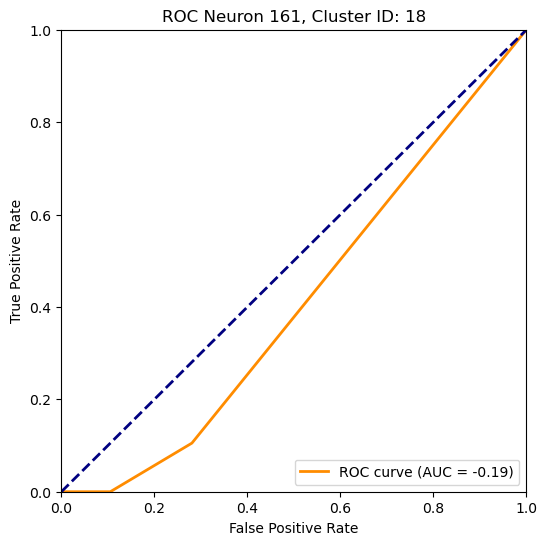

In [2]:

mouse_name = 'AB116_20240724_102941'
main_path = '/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens'

process_and_save_roc(mouse_name, main_path)
    